In [1]:
epochs = 400
def learning_rate(i):
    lr = 1e-1
    if i>= 300:
        lr = 1e-2
    if i>= 350:
        lr = 1e-3
    return lr

In [2]:
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(404, 13) (404, 1) (102, 13) (102, 1)


In [3]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [4]:
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [5]:
x = tf.placeholder(tf.float32, (None, 13)) 
y = tf.placeholder(tf.float32, (None, 1))
lr = tf.placeholder(tf.float32, ())

init_b = tf.keras.initializers.constant(0.0)
init_w = tf.keras.initializers.VarianceScaling(mode='fan_avg')

b1 = tf.get_variable('b1', (1,), tf.float32, init_b)
w1 = tf.get_variable('w1', (13, 1), tf.float32, init_w)

y_pred = x @ w1 + b1
loss = tf.nn.l2_loss(y-y_pred) 
train = tf.train.RMSPropOptimizer(lr).minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
with tf.Session() as sess:
    init.run()
    #saver.restore(sess, 'save/nn.ckpt')
    
    loss_trace = []

    for i in range(epochs):
        print()
        print('epoch {}/{}'.format(i, epochs), end=' ')
        feed_dict = {x: x_train, y: y_train, lr: learning_rate(i)}
        loss_run, _ = sess.run([loss, train], feed_dict=feed_dict)
        loss_trace.append(loss_run)

    feed_dict = {x: x_test, y: y_test}
    loss_test_run = sess.run(loss, feed_dict=feed_dict)
    
    saver.save(sess, 'save/nn.ckpt')


epoch 0/400 
epoch 1/400 
epoch 2/400 
epoch 3/400 
epoch 4/400 
epoch 5/400 
epoch 6/400 
epoch 7/400 
epoch 8/400 
epoch 9/400 
epoch 10/400 
epoch 11/400 
epoch 12/400 
epoch 13/400 
epoch 14/400 
epoch 15/400 
epoch 16/400 
epoch 17/400 
epoch 18/400 
epoch 19/400 
epoch 20/400 
epoch 21/400 
epoch 22/400 
epoch 23/400 
epoch 24/400 
epoch 25/400 
epoch 26/400 
epoch 27/400 
epoch 28/400 
epoch 29/400 
epoch 30/400 
epoch 31/400 
epoch 32/400 
epoch 33/400 
epoch 34/400 
epoch 35/400 
epoch 36/400 
epoch 37/400 
epoch 38/400 
epoch 39/400 
epoch 40/400 
epoch 41/400 
epoch 42/400 
epoch 43/400 
epoch 44/400 
epoch 45/400 
epoch 46/400 
epoch 47/400 
epoch 48/400 
epoch 49/400 
epoch 50/400 
epoch 51/400 
epoch 52/400 
epoch 53/400 
epoch 54/400 
epoch 55/400 
epoch 56/400 
epoch 57/400 
epoch 58/400 
epoch 59/400 
epoch 60/400 
epoch 61/400 
epoch 62/400 
epoch 63/400 
epoch 64/400 
epoch 65/400 
epoch 66/400 
epoch 67/400 
epoch 68/400 
epoch 69/400 
epoch 70/400 
epoch 71/400 
e

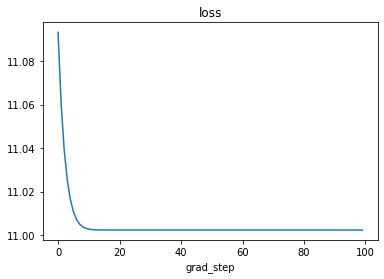

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.array(loss_trace[300:])/404)
ax.set_title('loss')
ax.set_xlabel('grad_step')
plt.show()

In [8]:
print('Test L2 Loss :', loss_test_run/102)

Test L2 Loss : 11.597895603553921
